<a href="https://colab.research.google.com/github/babcockt18/On-Nonlinearities-in-QML-Paper-Implementation/blob/main/QHP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation of *Nonlinear transformations in quantum computation*

In [1]:
# Installs
%pip install -qqq pennylane --progress-bar off

In [2]:
# Imports
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [27]:
# 5-qubit input state
states = [[1 / np.sqrt(2), 1 / np.sqrt(2)],[1 / np.sqrt(2), 1 / np.sqrt(2)],[1 / np.sqrt(2), 1 / np.sqrt(2)],[1 / np.sqrt(2), 1 / np.sqrt(2)],[1 / np.sqrt(2), 1 / np.sqrt(2)]]

# states = [[.01, 0], [0, .01], [0,0], [0,0], [0,0]]

# norm = np.linalg.norm(states)

# states = states/norm

# Define the power to raise the nonlinearity
k = 2

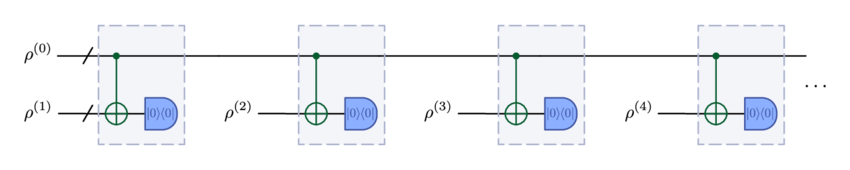

In [35]:
# instantiate qml.device that can load weighted states
dev = qml.device('default.mixed', wires=5, shots=1000)

# Iterated Quantum Hadamard Product Circuit
@qml.qnode(dev, diff_method="best")
def circuit(states, k):
    """
    Implement an Iterated Quantum Hadamard Product (QHP) Circuit using a quantum node.

    :param states: A list of quantum states (as state vectors) to be loaded onto the qubits.
                   The first element in the list is loaded onto the first qubit and so on.
    :param k: An integer representing the number of iterations to apply the quantum circuit operations.

    :return: A dictionary containing the counts of measurement outcomes across all shots.
    """
    qml.QubitStateVector(states[0], wires=[0])
    for _ in range(k):
        for i in range(1, len(states)):
            qml.QubitStateVector(states[i], wires=[i]) # Set the state of qubit 'i' to 'states[i]'
            qml.CNOT(wires=[0, i]) # Apply a CNOT gate with qubit 0 as control and qubit 'i' as target
            qml.Projector([0,0], wires=[i]) # Implements M = |0X0| operator on the recently instantiated and 'CNOT'ed wire in the target register

    return qml.counts()
    # return qml.counts(operator)
    # return qml.state()

In [36]:
print('The counts output is: {0}'.format(circuit(states, k)))
# print(circuit(states,qml.PauliY(0), k))

The counts output is: {'01111': 496, '10000': 504}


In [31]:
# TODO: figure out if we need to derive this from the input states somehow
O = {
 '00000':0,
 '00001': 0,
 '00010': 0,
 '00011': 0,
 '00100': 0,
 '00101': 0,
 '00110': 0,
 '00111': 0,
 '01000': 0,
 '01001': 0,
 '01010': 0,
 '01011': 0,
 '01100': 0,
 '01101': 0,
 '01110': 0,
 '01111': 0,
 '10000': 1,
 '10001': 0,
 '10010': 0,
 '10011': 0,
 '10100': 0,
 '10101': 0,
 '10110': 0,
 '10111': 0,
 '11000': 0,
 '11001': 0,
 '11010': 0,
 '11011': 0,
 '11100': 0,
 '11101': 0,
 '11110': 0,
 '11111': 0,
}


In [32]:
def calculate_qhp_values(counts, O):
    """
    Calculate the expectation value and variance for the QHP algorithm.

    :param counts: A dictionary of measurement outcomes and their frequencies.
    :param O: A dictionary representing the observable O, with keys being the outcomes and values being the eigenvalues.

    :return: A tuple containing the expectation value and variance.
    """
    s = sum(counts.values())  # total number of measurements

    # Calculate the expectation value of O
    expectation_value = sum(O[outcome] * freq for outcome, freq in counts.items()) / s

    # Calculate the second moment (expectation value of O^2)
    second_moment = sum((O[outcome]**2) * freq for outcome, freq in counts.items()) / s

    # Calculate the variance
    variance = (second_moment - expectation_value**2) / s

    return expectation_value, variance



In [37]:
# List of Powers of K to plot on x-axis
powers_k = np.array([2,3,4,5,6,7,8,9])

# Lists circuit outputs for each powere of K
k_counts = [circuit(states, k) for k in powers_k]

# Lists expectation and variance respectively for each circuit run at each power of K
expandvars = [calculate_qhp_values(counts, O) for counts in k_counts]

# Lists absolute and relative errors for each circuit run at each power of K
errors = [(np.sqrt(variance), np.sqrt(variance)/expectation) for expectation, variance in expandvars]

absolute_sampling_error = np.array([e for e, _ in errors])

relative_error = np.array([e for _, e in errors])

expected_values = np.array([expectation for expectation, _ in expandvars])


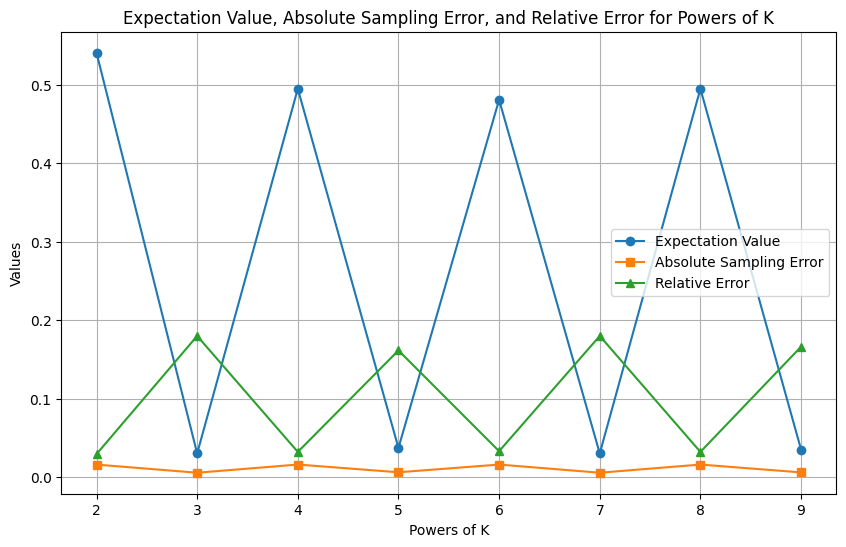

In [38]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(powers_k, expected_values, label='Expectation Value', marker='o')
plt.plot(powers_k, absolute_sampling_error, label='Absolute Sampling Error', marker='s')
plt.plot(powers_k, relative_error, label='Relative Error', marker='^')

plt.xlabel('Powers of K')
plt.ylabel('Values')
plt.title('Expectation Value, Absolute Sampling Error, and Relative Error for Powers of K')
plt.legend()
plt.grid(True)
plt.show()

# Appendix/Graveyard

In [ ]:
states = [[1 / np.sqrt(2), 1 / np.sqrt(2)],[1 / np.sqrt(2), 1 / np.sqrt(2)]]
# instantiate qml.device that can load weighted states
dev = qml.device('default.mixed', wires=2, shots=None)

# Quantum Hadamard Product Circuit
@qml.qnode(dev)
def circuit(states):
    qml.QubitStateVector(states[0], wires=[0])
    qml.QubitStateVector(states[1], wires=[1])
    qml.CNOT(wires=[0, 1])
    qml.Projector([0], [1])

    return qml.density_matrix(wires=[0,1])

In [ ]:
print('The counts output is: {0}'.format(circuit(states)))

ValueError: ignored

In [ ]:
states = [[1 / np.sqrt(2), 1 / np.sqrt(2)],[1 / np.sqrt(2), 1 / np.sqrt(2)]]
# instantiate qml.device that can load weighted states
dev = qml.device('default.mixed', wires=2, shots=1000)

# Quantum Hadamard Product Circuit
@qml.qnode(dev)
def circuit(states, operator):
    qml.QubitStateVector(states[0], wires=[0])
    qml.QubitStateVector(states[1], wires=[1])
    qml.CNOT(wires=[0, 1])

    return qml.counts(operator @ qml.Projector([0], [1]))

In [ ]:
print('The counts output is: {0}'.format(circuit(states, qml.PauliZ(0))))

The counts output is: {-1.0: 223, 0.0: 503, 1.0: 274}


there is a relationship between the measurement operator (e.g. PauliZ), the binary encoding of a state (e.g. '01000'), and the frequency that the operator returns a measurement with a given binary encoding